In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
house = pd.read_csv('housing_in_london_yearly_variables.csv')
house.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [3]:
# Display the dimensions of the DataFrame
print(house.shape)

# Provide summary statistics for each column
print(house.describe(include='all'))

# Display the structure of the DataFrame
print(house.info())

(1071, 12)
             code            area        date  median_salary  \
count        1071            1071        1071    1049.000000   
unique         51              51          21            NaN   
top     E09000001  city of london  1999-12-01            NaN   
freq           21              21          51            NaN   
mean          NaN             NaN         NaN   27977.792183   
std           NaN             NaN         NaN    6412.807487   
min           NaN             NaN         NaN   15684.000000   
25%           NaN             NaN         NaN   23857.000000   
50%           NaN             NaN         NaN   27441.000000   
75%           NaN             NaN         NaN   30932.000000   
max           NaN             NaN         NaN   61636.000000   

        life_satisfaction mean_salary recycling_pct  population_size  \
count          352.000000        1071           860     1.018000e+03   
unique                NaN        1041            57              NaN   
top 

In [4]:
# Identify and display rows that are duplicates
house.duplicated()

# Display the number of NULL values
print("NULL values in the DataFrame:")
print(house.isnull().sum().sum())

# Display the number of NA values
print("NA values in the DataFrame:")
print(house.isna().sum().sum())

# Print the number of NA values in each column
print("NA values in each column:")
print(house.isna().sum())

# Remove column "code"
house.drop(house.columns[0], axis=1, inplace=True)

# Extract years from the 'date' column
house['date'] = pd.to_datetime(house['date'])  # Convert to datetime type if it's not already
years = house['date'].dt.year

# Replace the 'date' column with the 'years' list
house['date'] = years

print(house.info())

NULL values in the DataFrame:
1955
NA values in the DataFrame:
1955
NA values in each column:
code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               1071 non-null   object 
 1   date               1071 non-null   int32  
 2   median_salary      1049 non-null   float64
 3   life_satisfaction  352 non-null    float64
 4   mean_salary        1071 non-null   object 
 5   recycling_pct      860 non-null    object 
 6   population_size    1018 non-null   float64
 7   number_of_jobs     931 non-null    float64
 8   a

In [5]:
#check data in columns
frequency_tables = {}
for column in house.columns:
    frequency_tables[column] = house[column].value_counts()

# Print frequency tables
for column, table in frequency_tables.items():
    print(f"Frequency table for column '{column}':\n{table}\n")

Frequency table for column 'area':
area
city of london              21
east                        21
sutton                      21
tower hamlets               21
waltham forest              21
wandsworth                  21
westminster                 21
north east                  21
north west                  21
yorkshire and the humber    21
east midlands               21
west midlands               21
london                      21
richmond upon thames        21
south east                  21
south west                  21
inner london                21
outer london                21
england                     21
united kingdom              21
great britain               21
england and wales           21
northern ireland            21
scotland                    21
southwark                   21
redbridge                   21
barking and dagenham        21
hammersmith and fulham      21
barnet                      21
bexley                      21
brent                       21

In [6]:
# Converting data types for various columns
house['area'] = house['area'].astype('category', errors='ignore')
house['mean_salary'] = pd.to_numeric(house['mean_salary'], errors='coerce')
house['recycling_pct'] = pd.to_numeric(house['recycling_pct'], errors='coerce')
house['population_size'] = pd.to_numeric(house['population_size'], errors='coerce')
house['number_of_jobs'] = pd.to_numeric(house['number_of_jobs'], errors='coerce')
house['area_size'] = pd.to_numeric(house['area_size'], errors='coerce')
house['no_of_houses'] = pd.to_numeric(house['no_of_houses'], errors='coerce')
house['borough_flag'] = house['borough_flag'].astype('category', errors='ignore')

In [7]:
# Extract numeric columns
numeric_columns = house.select_dtypes(include=['number']).columns

# Perform imputation using IterativeImputer on numeric columns
imputer = IterativeImputer(min_value=0, random_state=500)
house_imputed_values = imputer.fit_transform(house[numeric_columns])

# Convert the imputed values array back to a DataFrame
house_imputed = pd.DataFrame(house_imputed_values, columns=numeric_columns)

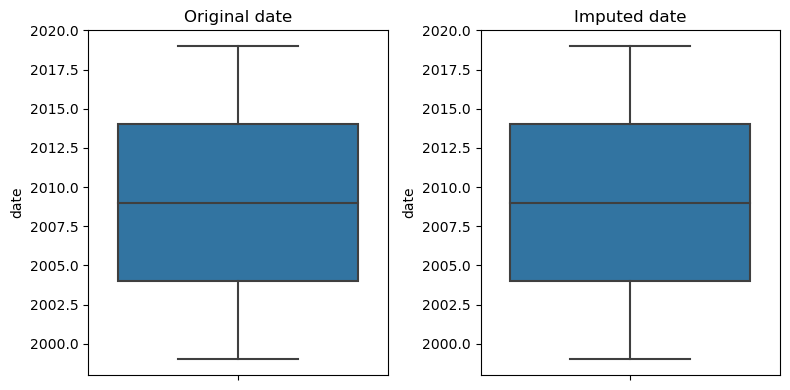

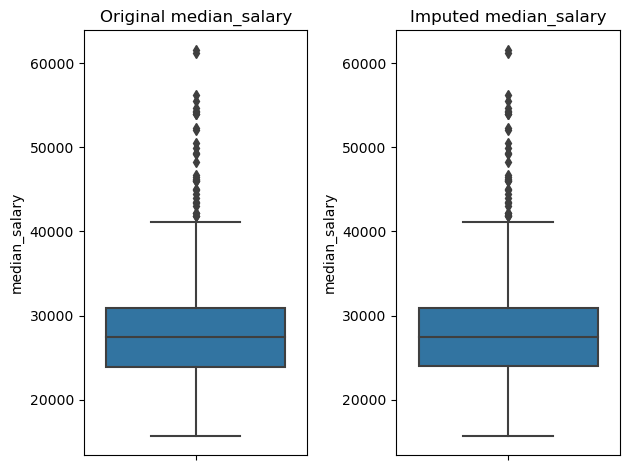

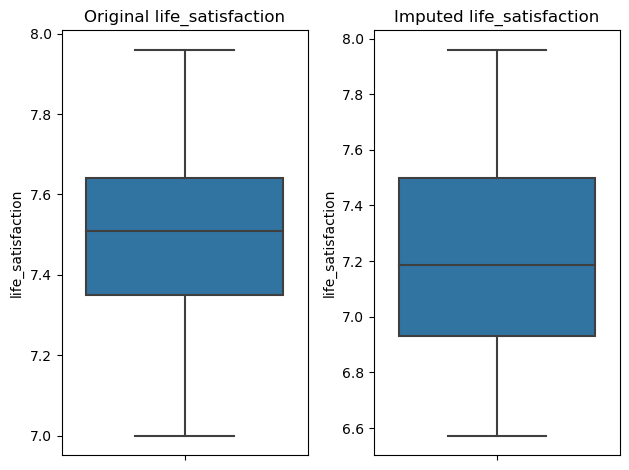

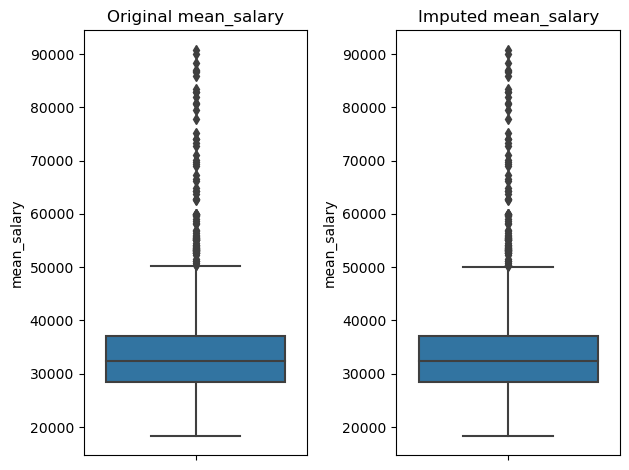

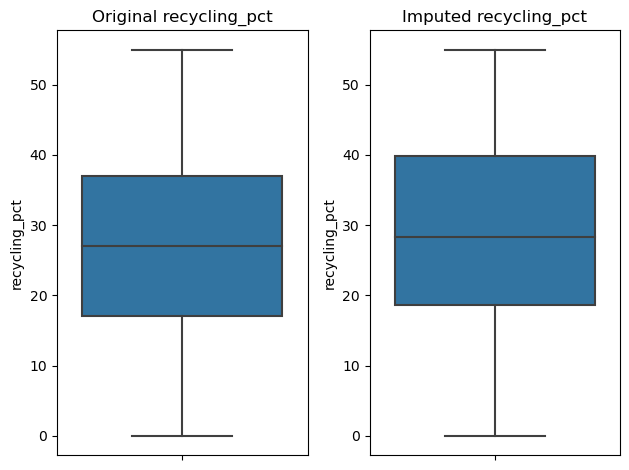

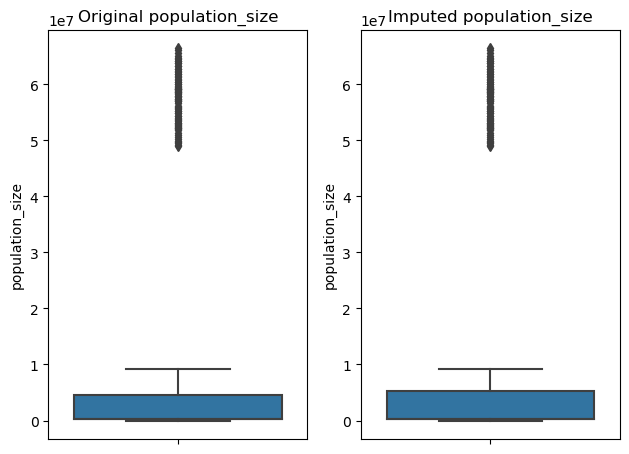

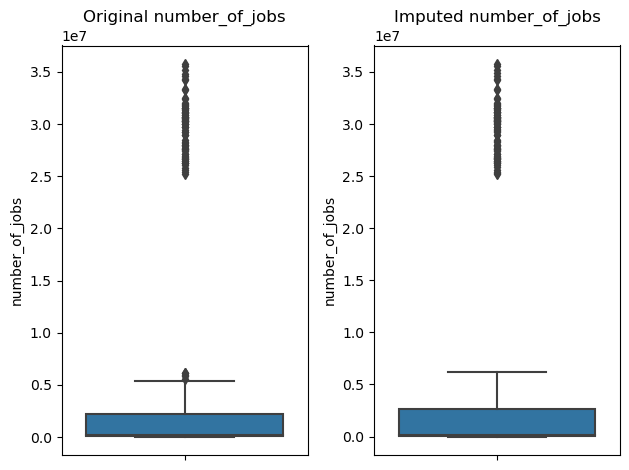

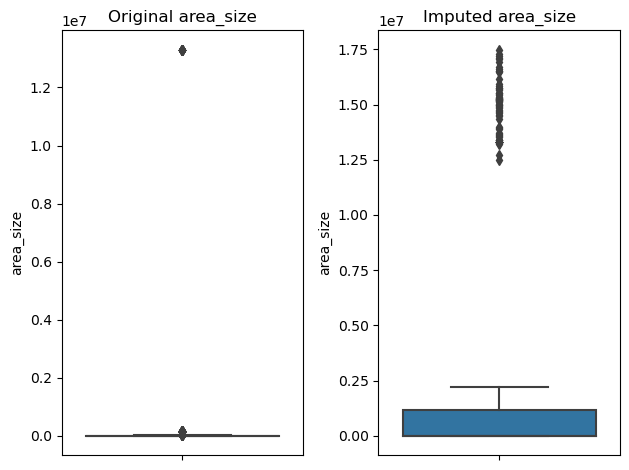

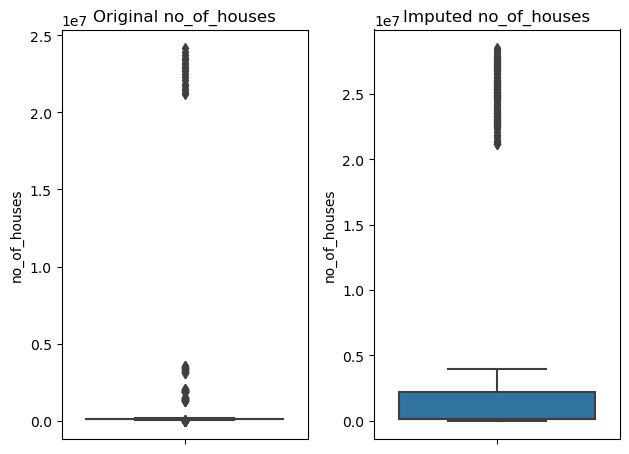

In [8]:
# Create boxplots comparing original and imputed columns
plt.figure(figsize=(8, 4))
for column in numeric_columns:
    plt.subplot(1, 2, 1)
    sns.boxplot(data=house, y=column)
    plt.title('Original ' + column)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=house_imputed, y=column)
    plt.title('Imputed ' + column)
    
    plt.tight_layout()
    plt.show()

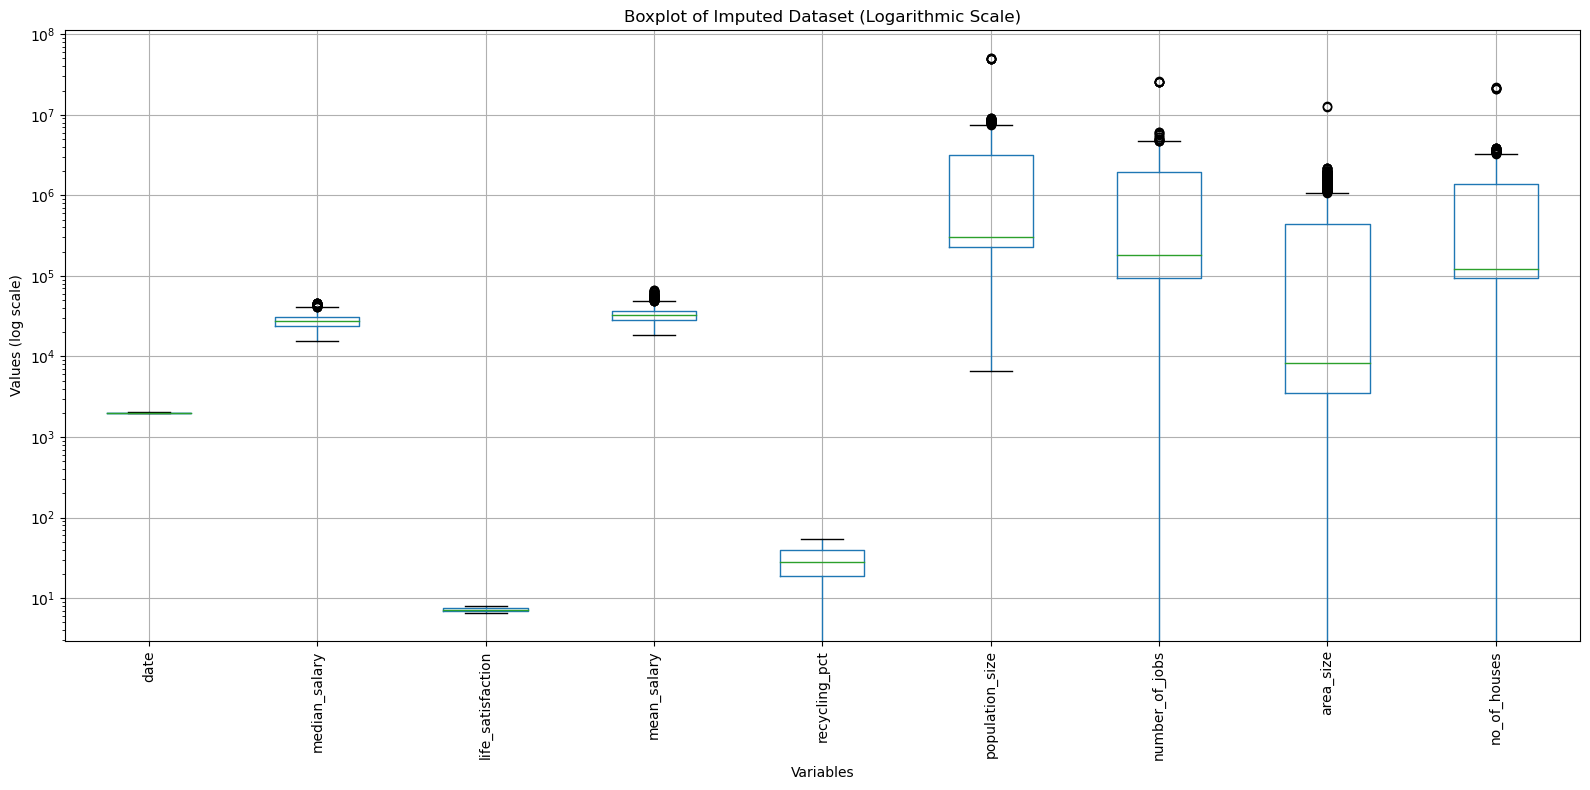

In [9]:
from scipy.stats import zscore

# Calculate z-scores for each numeric column
z_scores = house_imputed.apply(zscore)

# Set a threshold for outlier detection
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Impute outliers with median value of the column
house_imputed_df = house_imputed.where(~outliers, house_imputed.median(), axis=1)

# Create boxplots for all columns
plt.figure(figsize=(16, 8))
plt.yscale('log')
house_imputed_df.boxplot(rot=90)
plt.title('Boxplot of Imputed Dataset (Logarithmic Scale)')
plt.xlabel('Variables')
plt.ylabel('Values (log scale)')
plt.tight_layout()
plt.show()

date                 0.448688
median_salary        0.883155
life_satisfaction    0.338427
mean_salary          1.000000
recycling_pct        0.179979
population_size     -0.098994
number_of_jobs      -0.045442
area_size           -0.202162
no_of_houses        -0.101832
Name: mean_salary, dtype: float64

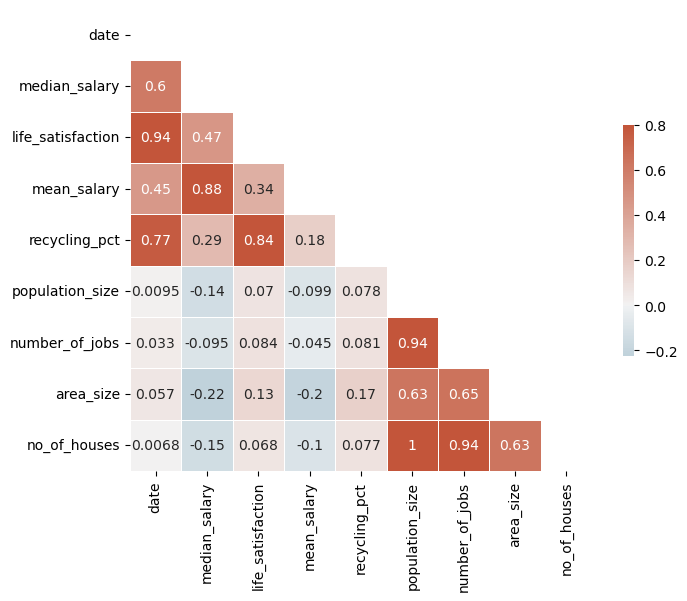

In [10]:
# Compute the correlation matrix for the numeric columns
correlation_matrix = house_imputed_df.corr(method='pearson')

# Plotting the correlation matrix with a heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Extract correlation values for 'mean_salary' with other variables
mean_salary_correlation = correlation_matrix.loc['mean_salary']
mean_salary_correlation

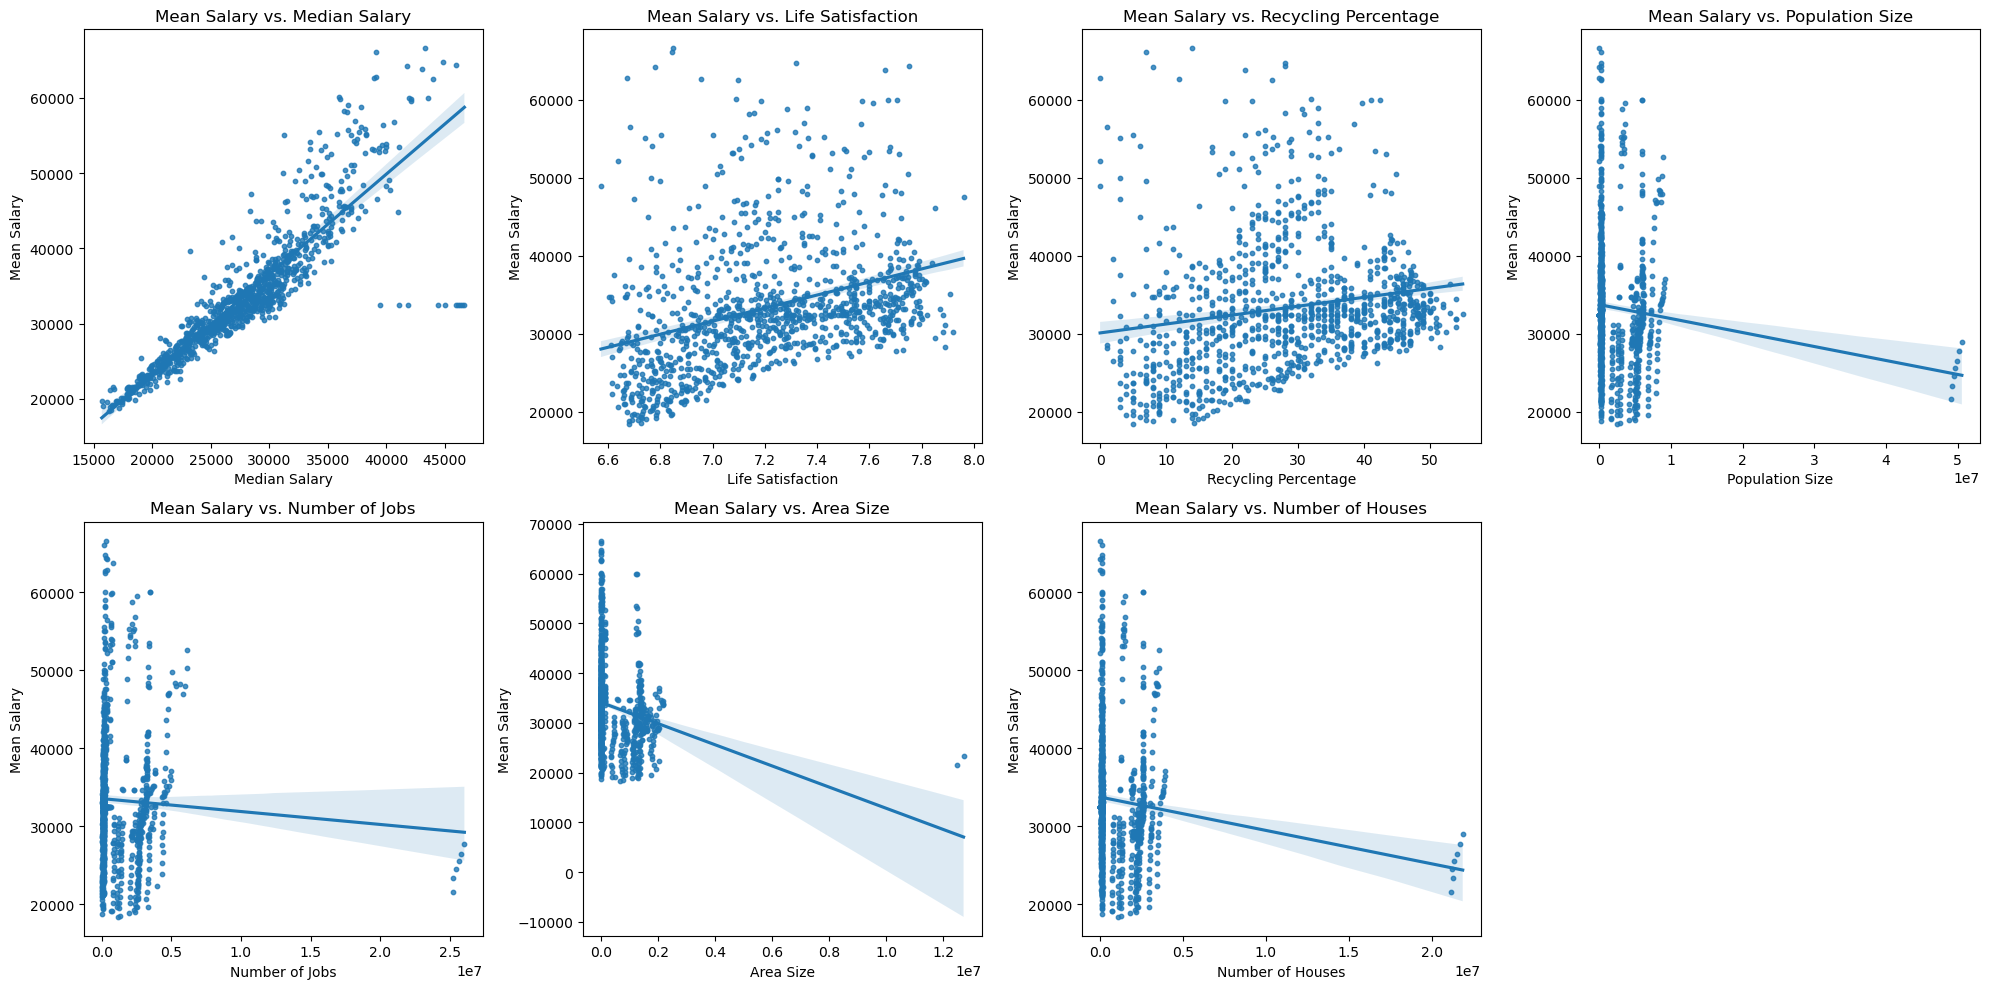

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Mean Salary vs. Median Salary
sns.regplot(ax=axes[0, 0], y='mean_salary', x='median_salary', data=house_imputed_df, scatter_kws={'s':10})
axes[0, 0].set_title('Mean Salary vs. Median Salary')
axes[0, 0].set_xlabel('Median Salary')
axes[0, 0].set_ylabel('Mean Salary')

# Mean Salary vs. Life Satisfaction
sns.regplot(ax=axes[0, 1], y='mean_salary', x='life_satisfaction', data=house_imputed_df, scatter_kws={'s':10})
axes[0, 1].set_title('Mean Salary vs. Life Satisfaction')
axes[0, 1].set_xlabel('Life Satisfaction')
axes[0, 1].set_ylabel('Mean Salary')

# Mean Salary vs. Recycling Percentage
sns.regplot(ax=axes[0, 2], y='mean_salary', x='recycling_pct', data=house_imputed_df, scatter_kws={'s':10})
axes[0, 2].set_title('Mean Salary vs. Recycling Percentage')
axes[0, 2].set_xlabel('Recycling Percentage')
axes[0, 2].set_ylabel('Mean Salary')

# Mean Salary vs. Population Size
sns.regplot(ax=axes[0, 3], y='mean_salary', x='population_size', data=house_imputed_df, scatter_kws={'s':10})
axes[0, 3].set_title('Mean Salary vs. Population Size')
axes[0, 3].set_xlabel('Population Size')
axes[0, 3].set_ylabel('Mean Salary')

# Mean Salary vs. Number of Jobs
sns.regplot(ax=axes[1, 0], y='mean_salary', x='number_of_jobs', data=house_imputed_df, scatter_kws={'s':10})
axes[1, 0].set_title('Mean Salary vs. Number of Jobs')
axes[1, 0].set_xlabel('Number of Jobs')
axes[1, 0].set_ylabel('Mean Salary')

# Mean Salary vs. Area Size
sns.regplot(ax=axes[1, 1], y='mean_salary', x='area_size', data=house_imputed_df, scatter_kws={'s':10})
axes[1, 1].set_title('Mean Salary vs. Area Size')
axes[1, 1].set_xlabel('Area Size')
axes[1, 1].set_ylabel('Mean Salary')

# Mean Salary vs. Number of Houses
sns.regplot(ax=axes[1, 2], y='mean_salary', x='no_of_houses', data=house_imputed_df, scatter_kws={'s':10})
axes[1, 2].set_title('Mean Salary vs. Number of Houses')
axes[1, 2].set_xlabel('Number of Houses')
axes[1, 2].set_ylabel('Mean Salary')

# Hide the last empty subplot
axes[1, 3].axis('off')

plt.tight_layout()

# Save the image
plt.savefig(r'C:\Users\Dell\scatter_plots.png')

plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables excluding 'mean_salary'
independent_vars = house_imputed_df.drop('mean_salary', axis=1)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

# Print the VIF for each variable
print(vif_data)

             feature          VIF
0               date  1680.399452
1      median_salary    39.317632
2  life_satisfaction  2180.826096
3      recycling_pct    20.618080
4    population_size  5302.996318
5     number_of_jobs    12.630809
6          area_size     2.673528
7       no_of_houses  5162.960642


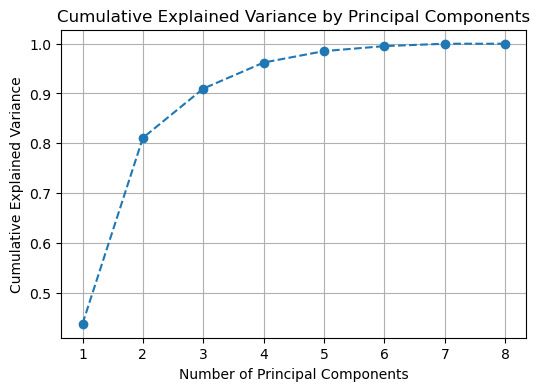

  Principal Component  Explained Variance Ratio
0                 PC1                  0.437312
1                 PC2                  0.373644
2                 PC3                  0.098896
3                 PC4                  0.052327
4                 PC5                  0.023005
5                 PC6                  0.009995
6                 PC7                  0.004806
7                 PC8                  0.000014


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding the dependent variable 'mean_salary')
independent_vars = house_imputed_df.drop('mean_salary', axis=1)
scaler = StandardScaler()
independent_vars_scaled = scaler.fit_transform(independent_vars)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(independent_vars_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, 
                      columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the explained variance ratio for each component
explained_variance = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                                   'Explained Variance Ratio': pca.explained_variance_ratio_})
print(explained_variance)

# Append the dependent variable to the PCA DataFrame
pca_df['mean_salary'] = house_imputed_df['mean_salary']


In [14]:
# Perform stepwise AIC to extract variables for ridge, rf, knn and svm models

import statsmodels.api as sm

# Fit the initial full model
X = house_imputed_df.drop(columns=['mean_salary'])  # Predictors
y = house_imputed_df['mean_salary']  # Target variable

# Add constant to the predictors matrix
X = sm.add_constant(X)

full_model = sm.OLS(y, X).fit()

# Perform stepwise AIC
def stepwise_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if (min_p_value < 0.05):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features = stepwise_selection(X, y)

# Fit model with selected features
optimal_model = sm.OLS(y, X[selected_features]).fit()

# View the summary of the optimal model
print(optimal_model.summary())


                            OLS Regression Results                            
Dep. Variable:            mean_salary   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1040.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        23:21:49   Log-Likelihood:                -10334.
No. Observations:                1071   AIC:                         2.068e+04
Df Residuals:                    1066   BIC:                         2.070e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
median_salary         1.5039      0.02

In [15]:
house_imputed_df = house_imputed_df[['median_salary', 'mean_salary', 'date', 'number_of_jobs', 'life_satisfaction']]
house_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_salary      1071 non-null   float64
 1   mean_salary        1071 non-null   float64
 2   date               1071 non-null   float64
 3   number_of_jobs     1071 non-null   float64
 4   life_satisfaction  1071 non-null   float64
dtypes: float64(5)
memory usage: 42.0 KB


In [16]:
non_numeric_columns = house.select_dtypes(exclude=['number']).columns

# Concatenate the non-numeric columns from the original house DataFrame with the imputed DataFrame
house_comp = pd.concat([house[non_numeric_columns], house_imputed_df], axis=1)
house_pca = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'mean_salary']] 
house_pca = pd.concat([house[non_numeric_columns], house_pca], axis=1)

# One-hot encode categorical columns
house_comp = pd.get_dummies(house_comp, columns=['area', 'borough_flag'])
house_pca = pd.get_dummies(house_pca, columns=['area', 'borough_flag'])
house_comp.info()
house_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   median_salary                  1071 non-null   float64
 1   mean_salary                    1071 non-null   float64
 2   date                           1071 non-null   float64
 3   number_of_jobs                 1071 non-null   float64
 4   life_satisfaction              1071 non-null   float64
 5   area_barking and dagenham      1071 non-null   bool   
 6   area_barnet                    1071 non-null   bool   
 7   area_bexley                    1071 non-null   bool   
 8   area_brent                     1071 non-null   bool   
 9   area_bromley                   1071 non-null   bool   
 10  area_camden                    1071 non-null   bool   
 11  area_city of london            1071 non-null   bool   
 12  area_croydon                   1071 non-null   b

# MultilinearRegression after PCA

Linear Regression Train RMSE: 2623.3679
Linear Regression Test RMSE: 4367.6378
Linear Regression Train R^2 Score: 0.8977
Linear Regression Test R^2 Score: 0.7401
Multilinear Regression CV Score: 0.8712


C:\Users\Dell\AppData\Local\Temp\ipykernel_11056\806443414.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Yp_test.min(), Yp_test.max()], [Yp_test.min(), Yp_test.max()], 'k--', lw=3, color='red')


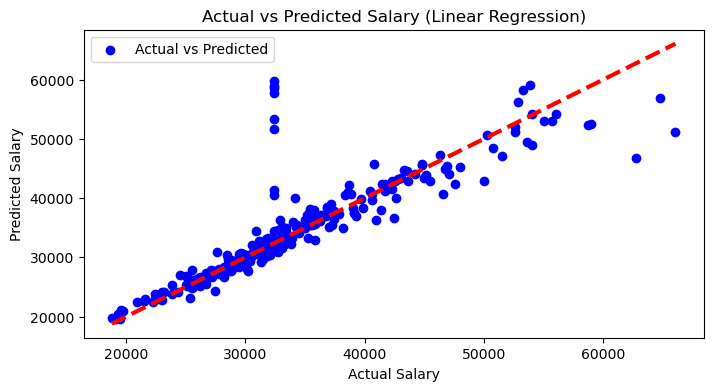

In [17]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

Xp = np.array(house_pca.drop(['mean_salary'], axis=1))
Yp = np.array(house_pca['mean_salary'])

# Normalize features
Xp = MinMaxScaler().fit_transform(Xp)

# Split the dataset into train and test sets
Xp_train, Xp_test, Yp_train, Yp_test = train_test_split(Xp, Yp, random_state=2)

# Create and fit the linear regression model
lr = LinearRegression().fit(Xp_train, Yp_train)

# Make predictions
lr_train_pred = lr.predict(Xp_train)
lr_test_pred = lr.predict(Xp_test)

# Calculate RMSE
lr_train_rmse = np.sqrt(mean_squared_error(Yp_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(Yp_test, lr_test_pred))

# Print results
print("Linear Regression Train RMSE:", round(lr_train_rmse, 4))
print("Linear Regression Test RMSE:", round(lr_test_rmse, 4))
print("Linear Regression Train R^2 Score:", round(lr.score(Xp_train, Yp_train), 4))
print("Linear Regression Test R^2 Score:", round(lr.score(Xp_test, Yp_test), 4))
lr_cv_score = cross_val_score(lr, Xp_train, Yp_train, cv=5)
print(f"Multilinear Regression CV Score: {lr_cv_score.mean():.4f}")


# Plot actual vs predicted for test data
plt.figure(figsize=(8, 4))
plt.scatter(Yp_test, lr_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([Yp_test.min(), Yp_test.max()], [Yp_test.min(), Yp_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Linear Regression)')
plt.legend()
plt.show()

# Ridge

In [18]:
X = np.array(house_comp.drop(['mean_salary'], axis=1))
Y = np.array(house_comp['mean_salary'])

# Normalize features
X = MinMaxScaler().fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2)

# Create and fit the ridge regression model
ridge = Ridge(alpha=1.0).fit(X_train, Y_train)
ridge10 = Ridge(alpha=10).fit(X_train, Y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)

# Make predictions
ridge_train_pred = ridge10.predict(X_train)
ridge_test_pred = ridge10.predict(X_test)

# Calculate RMSE
ridge_train_rmse = np.sqrt(mean_squared_error(Y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(Y_test, ridge_test_pred))

# Print results
print("Ridge Train RMSE:", round (ridge_train_rmse,4))
print("Ridge Test RMSE:", round(ridge_test_rmse,4))
print("Ridge Train R^2 Score:", round(ridge.score(X_train, Y_train),4))
print("Ridge Test R^2 Score:", round(ridge.score(X_test, Y_test),4))
ridge_cv_score = cross_val_score(ridge, X_test, Y_test, cv=5)
print(f"ridge CV Score: {ridge_cv_score.mean():.4f}")

Ridge Train RMSE: 3223.6942
Ridge Test RMSE: 4358.2525
Ridge Train R^2 Score: 0.9027
Ridge Test R^2 Score: 0.7537
ridge CV Score: 0.7670


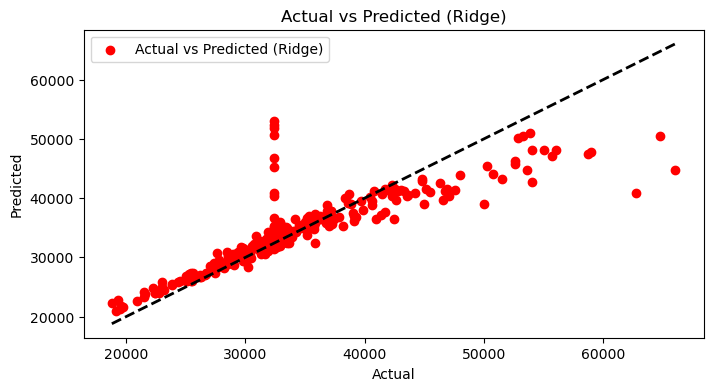

In [19]:
# Scatter plot for Ridge Regression
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, ridge_test_pred, color='red', label='Actual vs Predicted (Ridge)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge)')
plt.legend()
plt.show()

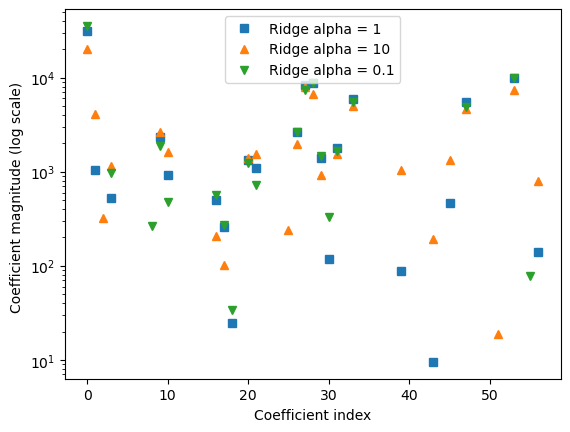

In [20]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")
#plt.plot(lr.coef_, 'o', label="Linear Regression")

plt.yscale('log')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude (log scale) ")
plt.legend()
plt.show()

# RandomForest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=2)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (Negative MSE): -7311000.835887814


In [22]:
# Make predictions with the best model
best_rf_train_pred = best_rf.predict(X_train)
best_rf_test_pred = best_rf.predict(X_test)

# Calculate RMSE with the best model
best_rf_train_rmse = np.sqrt(mean_squared_error(Y_train, best_rf_train_pred))
best_rf_test_rmse = np.sqrt(mean_squared_error(Y_test, best_rf_test_pred))

# Print RMSE results
print("\nBest Random Forest Train RMSE:", round(best_rf_train_rmse, 4))
print("Best Random Forest Test RMSE:", round(best_rf_test_rmse, 4))
print("Best Random Forest Train R^2 Score:", round(best_rf.score(X_train, Y_train), 4))
print("Best Random Forest Test R^2 Score:", round(best_rf.score(X_test, Y_test), 4))
rf_cv_score = cross_val_score(best_rf, X_test, Y_test, cv=5)
print(f"RandomForest CV Score: {rf_cv_score.mean():.4f}")


Best Random Forest Train RMSE: 1510.9525
Best Random Forest Test RMSE: 3362.1666
Best Random Forest Train R^2 Score: 0.9661
Best Random Forest Test R^2 Score: 0.846
RandomForest CV Score: 0.8186


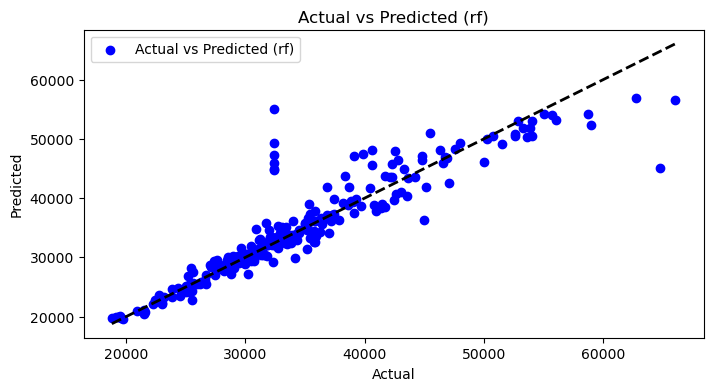

In [23]:
# Scatter plot for Random Forrest Regression
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, best_rf_test_pred, color='blue', label='Actual vs Predicted (rf)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (rf)')
plt.legend()
plt.show()

# KNN


KNN Train RMSE: 2252.3705
KNN Test RMSE: 3472.4443
KNN Train R^2 Score: 0.9246
KNN Test R^2 Score: 0.8357
KNeighbors CV Score: 0.6200


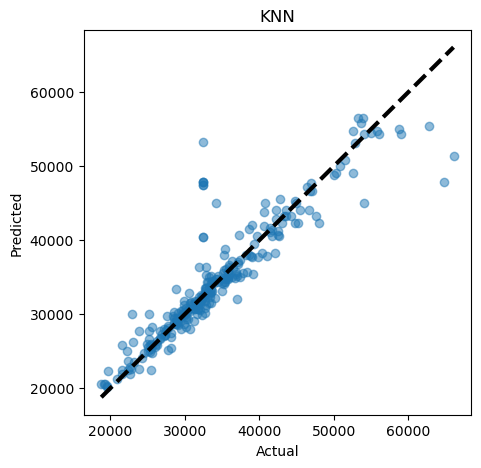

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the KNN model
knn = KNeighborsRegressor(n_neighbors=4).fit(X_train, Y_train)

# Make predictions
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

# Calculate RMSE
knn_train_rmse = np.sqrt(mean_squared_error(Y_train, knn_train_pred))
knn_test_rmse = np.sqrt(mean_squared_error(Y_test, knn_test_pred))

# Print results
print("\nKNN Train RMSE:", round(knn_train_rmse,4))
print("KNN Test RMSE:", round(knn_test_rmse,4))
print("KNN Train R^2 Score:", round(knn.score(X_train, Y_train),4))
print("KNN Test R^2 Score:", round(knn.score(X_test, Y_test),4))
knn_cv_score = cross_val_score(knn, X_test, Y_test, cv=5)
print(f"KNeighbors CV Score: {knn_cv_score.mean():.4f}")

# KNN
plt.figure(figsize=(5, 5))
plt.scatter(Y_test, knn_test_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN')
plt.show()

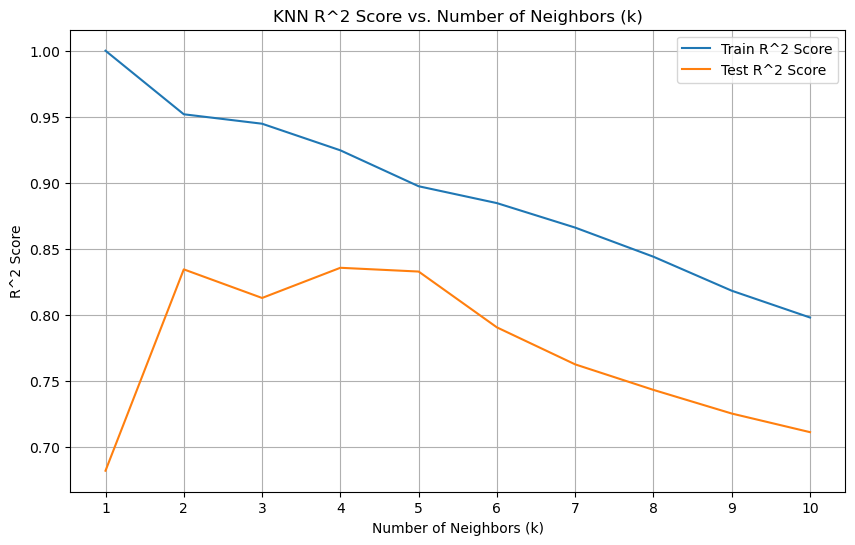

Best k: 4
Corresponding R^2 score: 0.835720485712706


In [25]:
# Define a range of values for k
k_values = range(1, 11)  # Assuming you want to plot for k=1 to k=10

train_r2_scores = []
test_r2_scores = []

# Iterate over each value of k
for k in k_values:
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Make predictions
    knn_train_pred = knn.predict(X_train)
    knn_test_pred = knn.predict(X_test)
    
    # Calculate R^2 scores
    train_r2 = knn.score(X_train, Y_train)
    test_r2 = knn.score(X_test, Y_test)
    
    # Append R^2 scores to lists
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_r2_scores, label='Train R^2 Score')
plt.plot(k_values, test_r2_scores, label='Test R^2 Score')
plt.title('KNN R^2 Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
# Find the index of the maximum R^2 score in the test R^2 scores
best_k_index = np.argmax(test_r2_scores)

# Get the corresponding best k value
best_k = k_values[best_k_index]

# Print the best k and its R^2 score
print("Best k:", best_k)
print("Corresponding R^2 score:", test_r2_scores[best_k_index])

# SVM

In [26]:
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'C': 100, 'coef0': 1.0, 'degree': 4, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'poly'}



Best SVM Train RMSE: 3220.7667
Best SVM Test RMSE: 4446.3378
Best SVM Train R^2 Score: 0.8459
Best SVM Test R^2 Score: 0.7306
KNeighbors CV Score: 0.5909


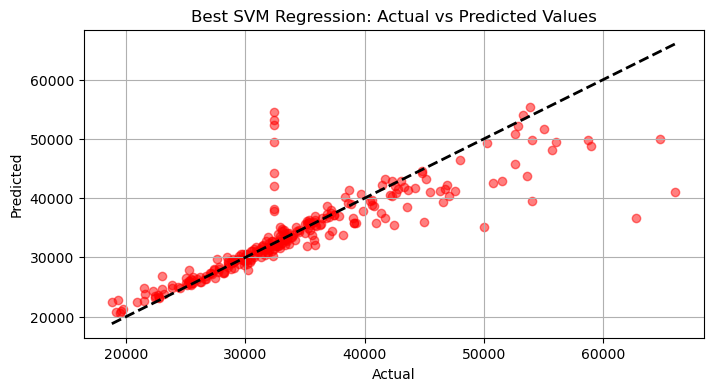

In [27]:
# Train the final SVM model with the best parameters
best_svm = SVR(**best_params).fit(X_train, Y_train)

# Make predictions
best_svm_train_pred = best_svm.predict(X_train)
best_svm_test_pred = best_svm.predict(X_test)

# Calculate RMSE
best_svm_train_rmse = np.sqrt(mean_squared_error(Y_train, best_svm_train_pred))
best_svm_test_rmse = np.sqrt(mean_squared_error(Y_test, best_svm_test_pred))

# Print results
print("\nBest SVM Train RMSE:", round(best_svm_train_rmse,4))
print("Best SVM Test RMSE:", round(best_svm_test_rmse,4))
print("Best SVM Train R^2 Score:", round(best_svm.score(X_train, Y_train),4))
print("Best SVM Test R^2 Score:", round(best_svm.score(X_test, Y_test),4))
svm_cv_score = cross_val_score(best_svm, X_test, Y_test, cv=5)
print(f"KNeighbors CV Score: {svm_cv_score.mean():.4f}")

# Plot actual vs predicted values for test data
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, best_svm_test_pred, alpha=0.5, color='r')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best SVM Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()

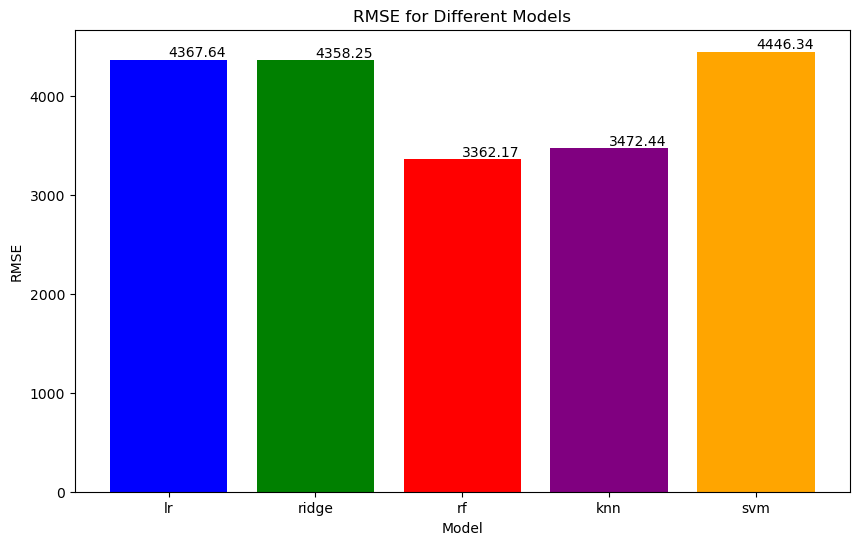

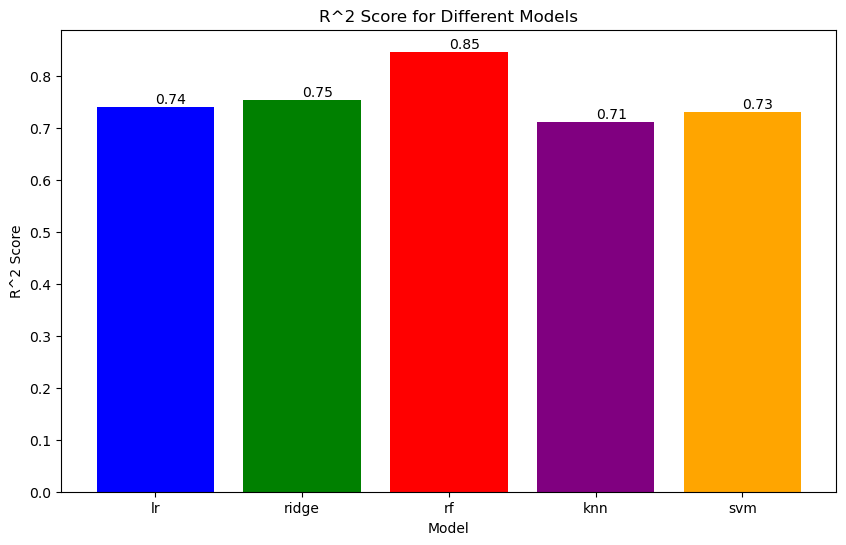

In [28]:
# Combine the RMSE values into a single list
rmse_values = [lr_test_rmse, ridge_test_rmse, best_rf_test_rmse, knn_test_rmse, best_svm_test_rmse]

# Create a list of labels for the models
labels = ['lr', 'ridge', 'rf', 'knn', 'svm']

# Define a list of colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, rmse_values, color=colors)
plt.title('RMSE for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Add the RMSE value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()
R2_Score = [lr.score(Xp_test, Yp_test), ridge.score(X_test, Y_test), best_rf.score(X_test, Y_test), knn.score(X_test, Y_test), best_svm.score(X_test, Y_test)]
labels = ['lr', 'ridge', 'rf', 'knn', 'svm']
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, R2_Score, color=colors)
plt.title('R^2 Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.show()

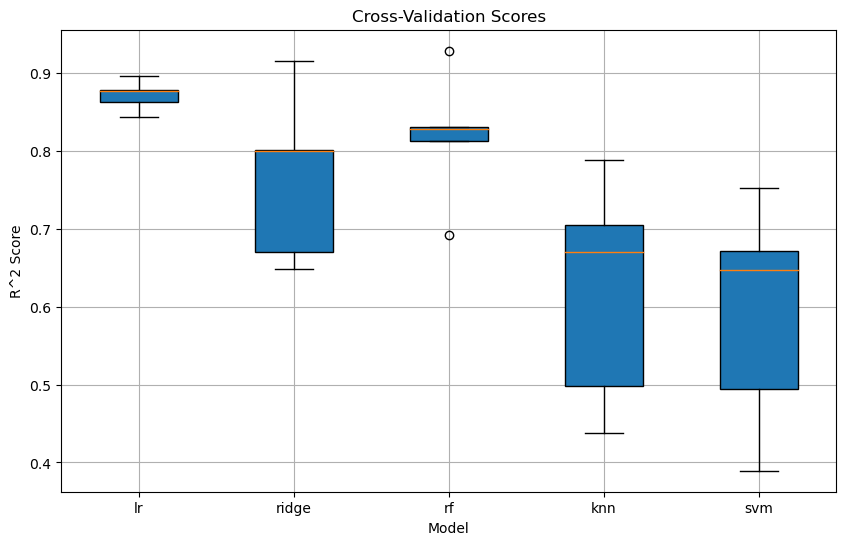

In [29]:
# Combine all the cross-validation scores into a single list
all_scores = [lr_cv_score, ridge_cv_score, rf_cv_score, knn_cv_score, svm_cv_score]


# Create a list of labels for the boxplots
labels = ['lr', 'ridge', 'rf', 'knn', 'svm']

# Plot all the boxplots in one figure
plt.figure(figsize=(10, 6))
plt.boxplot(all_scores, patch_artist=True, labels=labels)
plt.title('Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()